In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [4]:
image_path='C:\\Users\\omare\\EPLTeacking\\output_videos\\cropped_img.jpg'
image=cv2.imread(image_path)
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

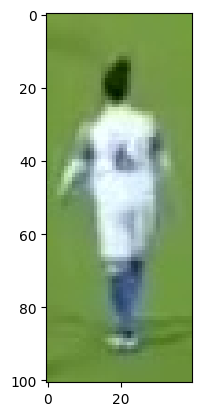

In [5]:
plt.imshow(image)

<function matplotlib.pyplot.show(close=None, block=None)>

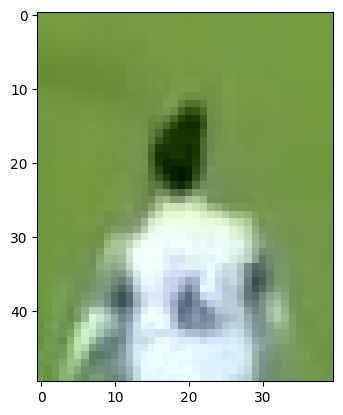

In [6]:
# take the top half of the imahe
top_half_image=image[0:int(image.shape[0]/2),:]
plt.imshow(top_half_image)
plt.show

In [8]:
!pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB 393.8 kB/s eta 0:00:28
   ---------------------------------------- 0.1/10.9 MB 804.6 kB/s eta 0:00:14
    --------------------------------------- 0.2/10.9 MB 1.2 MB/s eta 0:00:09
   - -------------------------------------- 0.4/10.9 MB 1.5 MB/s eta 0:00:08
   - -------------------------------------- 0.5/10.9 MB 1.8 MB/s eta 0:00:06
   -- ------------------------------------- 0.6/10.9 MB 2.0 MB/s eta 0:00:06
   -- ------------------------------------- 0.7/10.9 MB 2.0 MB/s eta 0:00:06
   -- ------------------------------------- 0.7/10.9 MB 2.0 MB/s eta 0:00:06
   --- ------------------------------------ 1.0/10.9 MB 2.3 MB/s eta 0:00:05
   ---- -----------------------

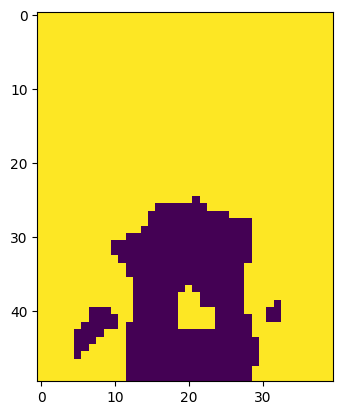

In [10]:
# Cluster the image into two clusters # reshape image into 2d array
from sklearn.cluster import KMeans
image_2d=top_half_image.reshape(-1,3)
kmeans=KMeans(n_clusters=2,random_state=0)
kmeans.fit(image_2d)

labels=kmeans.labels_

clustered_image=labels.reshape(top_half_image.shape[0],top_half_image.shape[1])

# Display the clustered image

plt.imshow(clustered_image)
plt.show()

In [11]:
corner_clusters=[clustered_image[0,0],clustered_image[0,-1],clustered_image[-1,0],clustered_image[-1,-1]]
non_player_cluster=max(set(corner_clusters),key=corner_clusters.count)
print(non_player_cluster)

1


In [12]:
player_cluster=1-non_player_cluster
print(player_cluster)

0


In [13]:
kmeans.cluster_centers_[player_cluster]

array([208.38560411, 227.84061697, 226.97172237])